Resources: https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/

# Websraping Homework

We are scraping ESPN's site conatining the top 100 highschool football prospects for 2022. Website: http://www.espn.com/college-sports/football/recruiting/playerrankings/_/position/athlete/class/2022/view/position

Our goal is to build a webscraper to do analysis on this table. We want to learn when most recruits commit, where the recruits are from, and what schools are getting high quality recruits.

In order to do this, we will be relying primarily on the Python Libraries requests, bs4, htm5lib, and pandas.

Authors: Cullan Bedwell + Lauren Bassett

Computing IDs: qja3fh + jme9rt

## Build Environment Needed for Analysis

In [1]:
# Install webscraping libraries 
! pip install requests3
! pip install html5lib
! pip install bs4
! pip install us

In [2]:
# Import needed libraries
import requests 
from bs4 import BeautifulSoup
import us
import pandas as pd

## Fetch Data from ESPN's Website

In [4]:
# Scrape ESPN website for top football recruits 2022
URL = "http://www.espn.com/college-sports/football/recruiting/playerrankings/_/position/athlete/class/2022/view/position"
r = requests.get(URL) 

soup = BeautifulSoup(r.content, 'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="https://www.facebook.com/2008/fbml">
 <head>
  <script>
   (function redirectToHttpIfHttps() {
   var win      = typeof window !== 'undefined' && window,
       location = win && win.location,
       protocol = location && location.protocol;

   if (protocol === 'https:' && !false) {
        location.href = location.href.replace('https://', 'http://');
   }
})();
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://a.espncdn.com/favicon.ico" mask="" rel="icon" sizes="any"/>
  <meta content="#CC0000" name="theme-color"/>
  <script type="text/javascript">
   if(true && navigator && navigator.userAgent.toLowerCase().indexOf("teamstream") >= 0) {
        window.location = 'http://m.espn.com/mobilecache/general/apps/sc';
    }
  </script>
  <title>
   ESPN Football Recruiting - Player Rankings - ESPN
  </title>
  <meta content="xuj1ODRluWa0frM-BjIr_aSHoUC7HB5C1MgmYAM_GkA" name="google-si

In [5]:
# Find the table containing athlete information
table = soup.find('table')
print(table.prettify())

<table cellpadding="0" cellspacing="0" width="100%">
 <tbody>
  <tr class="colhead">
   <td width="3%">
    RK
   </td>
   <td width="25%">
    PLAYER
   </td>
   <td width="6%">
    POS
   </td>
   <td width="20%">
    HOMETOWN
   </td>
   <td width="5%">
    HT
   </td>
   <td width="5%">
    WT
   </td>
   <td width="10%">
    STARS
   </td>
   <td width="3%">
    GRADE
   </td>
   <td width="23%">
    SCHOOL
   </td>
  </tr>
  <!--RF:show gradetrue-->
  <tr class="oddrow player-3540-240620">
   <td class="sortcell" style="color:#8a8a8a;font-weight:bold;text-align:center;vertical-align:middle; font-size:21px;">
    1
   </td>
   <td>
    <div class="name">
     <a href="http://www.espn.com/college-sports/football/recruiting/player/_/id/240620/sam-mccall">
      <strong>
       Sam McCall
      </strong>
     </a>
     <br/>
     <span>
      Video |
      <a href="http://insider.espn.com/college-sports/football/recruiting/player/evaluation/_/id/240620/sam-mccall">
       Scouts Repo

In [6]:
# Get the headers of the table
headers = []
for cell in table.find_all_next('tr')[0].find_all("td"):
    headers.append(cell.get_text())
    
print(headers)

['RK', 'PLAYER', 'POS', 'HOMETOWN', 'HT', 'WT', 'STARS', 'GRADE', 'SCHOOL']


In [7]:
# Print out a sample row to look at text available
for cell in table.find_all_next('tr')[1].find_all("td"):
    print(cell.get_text())

# Need custom logic
# Index 1 -> Remove "Video | Scouts Report"
# Index 3 -> Split into 2 -> Hometown + High School
# Index 6 -> Should have a star ranking as a class
# Index 8 -> Split into 3 -> University + Commitment Status + Commitment Date

1
Sam McCallVideo | Scouts Report
ATH
Lakeland, FLLake Gibson High School
6'0''
180

87
Florida StCommitted02/28/2021


In [8]:
# Print out another sample row to look at an uncommitted athlete
for cell in table.find_all_next('tr')[3].find_all("td"):
    print(cell.get_text())

# Custom Logic
# Index 8 -> This person has not commited anywhere so the formatting is different

3
Gentry WilliamsVideo | Scouts Report
ATH
Tulsa, OKBooker T. Washington High School
5'11''
170

86
List


In [9]:
# Custom Logic for Index 1
name = table.find_all_next('tr')[1].find_all("td")[1].find_all("strong")[0].get_text()
print(f'Name of first athlete: {name}')

Name of first athlete: Sam McCall


In [10]:
# Custom Logic for Index 3
hometown, high_school = str(table.find_all_next('tr')[1].find_all("td")[3])[4:-5].split('<br/>')
print(f'Hometown of first athlete: {hometown}')
print(f'High School of first athlete: {high_school}')

Hometown of first athlete: Lakeland, FL
High School of first athlete: Lake Gibson High School


In [11]:
# Custom Logic for Index 6
star_ranking = table.find_all_next('tr')[1].find_all("td")[6].find_all("li")[0].get('class')[1]
print(f'Star Ranking of first athlete: {star_ranking}')

Star Ranking of first athlete: four-star


In [12]:
# Custom Logic for Index 8
def Index8(cell):
    if len(cell.find_all("div")) == 2:
        commited = True

        entry8 = cell.find_all("div", {'class':'school-status'})[0]
        college = entry8.find_all("span")[0].get_text()
        commit_date = str(entry8).split('<br/>')[2][:-6]

    else:
        commited = False
        college = None
        commit_date = None

    return commited, college, commit_date

first_athlete = table.find_all_next('tr')[1].find_all("td")[8]
commited, college, commit_date = Index8(first_athlete)
print(f'First athlete is committed?: {commited}')
print(f"First athlete's committed school: {college}")
print(f"First athlete's commitment date: {commit_date}\n")

third_athlete = table.find_all_next('tr')[3].find_all("td")[8]
commited, college, commit_date = Index8(third_athlete)
print(f'Third athlete is committed?: {commited}')
print(f"Third athlete's committed school: {college}")
print(f"Third athlete's commitment date: {commit_date}")


First athlete is committed?: True
First athlete's committed school: Florida St
First athlete's commitment date: 02/28/2021

Third athlete is committed?: False
Third athlete's committed school: None
Third athlete's commitment date: None


In [13]:
# Loop through table and extract data
data = []
table_rows = table.find_all_next('tr')

for k in range(len(table_rows)-1):
    
    table_row = table_rows[k+1].find_all("td")

    rank = table_row[0].get_text()
    name = table_row[1].find_all("strong")[0].get_text()
    hometown, high_school = str(table_row[3])[4:-5].split('<br/>')
    height = table_row[4].get_text()
    weight = table_row[5].get_text()
    star_ranking = table_row[6].find_all("li")[0].get('class')[1]
    grade = table_row[7].get_text()
    commited, college, commit_date = Index8(table_row[8])

    player = [rank, name, hometown, height, weight, star_ranking, grade, college, commited, commit_date]
    data.append(player)

print(data[0])
print(data[2])


['1', 'Sam McCall', 'Lakeland, FL', "6'0''", '180', 'four-star', '87', 'Florida St', True, '02/28/2021']
['3', 'Gentry Williams', 'Tulsa, OK', "5'11''", '170', 'four-star', '86', None, False, None]


In [14]:
# Create Pandas DataFrame Utilizing Webscraped Data
df = pd.DataFrame(data, columns = ['rank', 'name', 'hometown','height','weight', 'star_ranking','grade', 'college', 'commited', 'commit_date'])
df.head(10)

,rank,name,hometown,height,weight,star_ranking,grade,college,commited,commit_date
0,1,Sam McCall,"Lakeland, FL",6'0'',180,four-star,87,Florida St,True,02/28/2021
1,2,Malaki Starks,"Jefferson, GA",6'1'',195,four-star,87,Georgia,True,03/24/2021
2,3,Gentry Williams,"Tulsa, OK",5'11'',170,four-star,86,None,False,None
3,4,Deyon Bouie,"Bainbridge, GA",5'11'',165,four-star,85,Texas A&M,True,08/13/2021
4,5,Antonio Kite,"Anniston, AL",6'2'',180,four-star,85,Alabama,True,07/04/2021
5,6,Larry Turner-Gooden,"Mission Hills, CA",5'10'',180,four-star,84,None,False,None
6,7,Kaleb Brown,"Chicago, IL",5'11'',180,four-star,84,Ohio State,True,06/07/2021
7,8,Brenen Thompson,"Spearman, TX",5'10'',170,four-star,84,None,False,None
8,9,Shemar James,"Mobile, AL",6'3'',200,four-star,83,Florida,True,06/20/2021
9,10,Kendrick Law,"Shreveport, LA",5'11'',185,four-star,83,None,False,None


In [15]:
# Write scaped table to csv
df.to_csv("2022_recruiting.csv", index=False)

## Perform Column Transformations for Additional Features

In [16]:
# Read in the webscraped data from saved csv file
recruits22 = pd.read_csv("2022_recruiting.csv")
recruits22.head(10)

,rank,name,hometown,height,weight,star_ranking,grade,college,commited,commit_date
0,1,Sam McCall,"Lakeland, FL",6'0'',180,four-star,87,Florida St,True,02/28/2021
1,2,Malaki Starks,"Jefferson, GA",6'1'',195,four-star,87,Georgia,True,03/24/2021
2,3,Gentry Williams,"Tulsa, OK",5'11'',170,four-star,86,NaN,False,NaN
3,4,Deyon Bouie,"Bainbridge, GA",5'11'',165,four-star,85,Texas A&M,True,08/13/2021
4,5,Antonio Kite,"Anniston, AL",6'2'',180,four-star,85,Alabama,True,07/04/2021
5,6,Larry Turner-Gooden,"Mission Hills, CA",5'10'',180,four-star,84,NaN,False,NaN
6,7,Kaleb Brown,"Chicago, IL",5'11'',180,four-star,84,Ohio State,True,06/07/2021
7,8,Brenen Thompson,"Spearman, TX",5'10'',170,four-star,84,NaN,False,NaN
8,9,Shemar James,"Mobile, AL",6'3'',200,four-star,83,Florida,True,06/20/2021
9,10,Kendrick Law,"Shreveport, LA",5'11'',185,four-star,83,NaN,False,NaN


In [17]:
# Transform height column to inches
def height_convert(row):
    height_lst = row['height'].split("'")
    inches = 12*int(height_lst[0]) + int(height_lst[1])
    return inches

recruits22['height_inches'] = recruits22.apply(lambda row: height_convert(row), axis=1)
recruits22.head(10)
   

,rank,name,hometown,height,weight,star_ranking,grade,college,commited,commit_date,height_inches
0,1,Sam McCall,"Lakeland, FL",6'0'',180,four-star,87,Florida St,True,02/28/2021,72
1,2,Malaki Starks,"Jefferson, GA",6'1'',195,four-star,87,Georgia,True,03/24/2021,73
2,3,Gentry Williams,"Tulsa, OK",5'11'',170,four-star,86,NaN,False,NaN,71
3,4,Deyon Bouie,"Bainbridge, GA",5'11'',165,four-star,85,Texas A&M,True,08/13/2021,71
4,5,Antonio Kite,"Anniston, AL",6'2'',180,four-star,85,Alabama,True,07/04/2021,74
5,6,Larry Turner-Gooden,"Mission Hills, CA",5'10'',180,four-star,84,NaN,False,NaN,70
6,7,Kaleb Brown,"Chicago, IL",5'11'',180,four-star,84,Ohio State,True,06/07/2021,71
7,8,Brenen Thompson,"Spearman, TX",5'10'',170,four-star,84,NaN,False,NaN,70
8,9,Shemar James,"Mobile, AL",6'3'',200,four-star,83,Florida,True,06/20/2021,75
9,10,Kendrick Law,"Shreveport, LA",5'11'',185,four-star,83,NaN,False,NaN,71


In [18]:
# Transform star_ranking column to an int
def star_convert(row):
    
    if row['star_ranking'] == 'four-star':
        return 4
    elif row['star_ranking'] == 'three-star':
        return 3
    else:
        return None

recruits22['star_rank_int'] = recruits22.apply(lambda row: star_convert(row), axis=1)
recruits22.head(10)

,rank,name,hometown,height,weight,star_ranking,grade,college,commited,commit_date,height_inches,star_rank_int
0,1,Sam McCall,"Lakeland, FL",6'0'',180,four-star,87,Florida St,True,02/28/2021,72,4
1,2,Malaki Starks,"Jefferson, GA",6'1'',195,four-star,87,Georgia,True,03/24/2021,73,4
2,3,Gentry Williams,"Tulsa, OK",5'11'',170,four-star,86,NaN,False,NaN,71,4
3,4,Deyon Bouie,"Bainbridge, GA",5'11'',165,four-star,85,Texas A&M,True,08/13/2021,71,4
4,5,Antonio Kite,"Anniston, AL",6'2'',180,four-star,85,Alabama,True,07/04/2021,74,4
5,6,Larry Turner-Gooden,"Mission Hills, CA",5'10'',180,four-star,84,NaN,False,NaN,70,4
6,7,Kaleb Brown,"Chicago, IL",5'11'',180,four-star,84,Ohio State,True,06/07/2021,71,4
7,8,Brenen Thompson,"Spearman, TX",5'10'',170,four-star,84,NaN,False,NaN,70,4
8,9,Shemar James,"Mobile, AL",6'3'',200,four-star,83,Florida,True,06/20/2021,75,4
9,10,Kendrick Law,"Shreveport, LA",5'11'',185,four-star,83,NaN,False,NaN,71,4


In [19]:
# Transform star_ranking column to an int
def state_convert(row):

    abrev = row['hometown'][-2:]
    state = us.states.lookup(abrev).name
    return state

recruits22['home_state'] = recruits22.apply(lambda row: state_convert(row), axis=1)
recruits22.head(10)

,rank,name,hometown,height,weight,star_ranking,grade,college,commited,commit_date,height_inches,star_rank_int,home_state
0,1,Sam McCall,"Lakeland, FL",6'0'',180,four-star,87,Florida St,True,02/28/2021,72,4,Florida
1,2,Malaki Starks,"Jefferson, GA",6'1'',195,four-star,87,Georgia,True,03/24/2021,73,4,Georgia
2,3,Gentry Williams,"Tulsa, OK",5'11'',170,four-star,86,NaN,False,NaN,71,4,Oklahoma
3,4,Deyon Bouie,"Bainbridge, GA",5'11'',165,four-star,85,Texas A&M,True,08/13/2021,71,4,Georgia
4,5,Antonio Kite,"Anniston, AL",6'2'',180,four-star,85,Alabama,True,07/04/2021,74,4,Alabama
5,6,Larry Turner-Gooden,"Mission Hills, CA",5'10'',180,four-star,84,NaN,False,NaN,70,4,California
6,7,Kaleb Brown,"Chicago, IL",5'11'',180,four-star,84,Ohio State,True,06/07/2021,71,4,Illinois
7,8,Brenen Thompson,"Spearman, TX",5'10'',170,four-star,84,NaN,False,NaN,70,4,Texas
8,9,Shemar James,"Mobile, AL",6'3'',200,four-star,83,Florida,True,06/20/2021,75,4,Alabama
9,10,Kendrick Law,"Shreveport, LA",5'11'',185,four-star,83,NaN,False,NaN,71,4,Louisiana


In [20]:
# Convert column types
recruits22['grade'] = recruits22['grade'].astype(int)
recruits22['weight'] = recruits22['weight'].astype(int)
recruits22['rank'] = recruits22['rank'].astype(int)
recruits22['commit_date'] = pd.to_datetime(recruits22['commit_date'])

recruits22.dtypes

rank                      int32
name                     object
hometown                 object
height                   object
weight                    int32
star_ranking             object
grade                     int32
college                  object
commited                   bool
commit_date      datetime64[ns]
height_inches             int64
star_rank_int             int64
home_state               object
dtype: object

In [21]:
# Transform commit_date column to commit_month
recruits22['commit_month'] = (pd.DatetimeIndex(recruits22['commit_date']).month).astype("Int32")
recruits22.head(10)

,rank,name,hometown,height,weight,star_ranking,grade,college,commited,commit_date,height_inches,star_rank_int,home_state,commit_month
0,1,Sam McCall,"Lakeland, FL",6'0'',180,four-star,87,Florida St,True,2021-02-28,72,4,Florida,2
1,2,Malaki Starks,"Jefferson, GA",6'1'',195,four-star,87,Georgia,True,2021-03-24,73,4,Georgia,3
2,3,Gentry Williams,"Tulsa, OK",5'11'',170,four-star,86,NaN,False,NaT,71,4,Oklahoma,<NA>
3,4,Deyon Bouie,"Bainbridge, GA",5'11'',165,four-star,85,Texas A&M,True,2021-08-13,71,4,Georgia,8
4,5,Antonio Kite,"Anniston, AL",6'2'',180,four-star,85,Alabama,True,2021-07-04,74,4,Alabama,7
5,6,Larry Turner-Gooden,"Mission Hills, CA",5'10'',180,four-star,84,NaN,False,NaT,70,4,California,<NA>
6,7,Kaleb Brown,"Chicago, IL",5'11'',180,four-star,84,Ohio State,True,2021-06-07,71,4,Illinois,6
7,8,Brenen Thompson,"Spearman, TX",5'10'',170,four-star,84,NaN,False,NaT,70,4,Texas,<NA>
8,9,Shemar James,"Mobile, AL",6'3'',200,four-star,83,Florida,True,2021-06-20,75,4,Alabama,6
9,10,Kendrick Law,"Shreveport, LA",5'11'',185,four-star,83,NaN,False,NaT,71,4,Louisiana,<NA>


## Exploring Websraped Data

In [22]:
# Look at the 10 states where the most recruits are from
recruits22['home_state'].value_counts().head(10)

Georgia        14
Florida        11
Texas          10
California     10
Alabama         7
Mississippi     6
Tennessee       5
Michigan        4
Illinois        3
Louisiana       3
Name: home_state, dtype: int64

In [23]:
# Look at the top 10 colleges where the most recruits have committed
recruits22['college'].value_counts().head(10)

Kentucky          4
Illinois          3
Georgia           3
Vanderbilt        3
Michigan St       3
Texas A&M         3
Florida St        3
Coast Carolina    2
Virginia Tech     2
Ohio State        2
Name: college, dtype: int64

In [24]:
# Create a pivot table of top 10 colleges with star ranking of recruits
top10_colleges = list(recruits22['college'].value_counts().head(10).index)
top10_colleges_df = recruits22[recruits22['college'].isin(top10_colleges)]

pd.pivot_table(top10_colleges_df, values='rank', index='college', columns='star_rank_int', aggfunc='count')

star_rank_int,3,4
college,,
Coast Carolina,2.0,NaN
Florida St,1.0,2.0
Georgia,1.0,2.0
Illinois,3.0,NaN
Kentucky,1.0,3.0
Michigan St,2.0,1.0
Ohio State,NaN,2.0
Texas A&M,1.0,2.0
Vanderbilt,3.0,NaN


<AxesSubplot:>

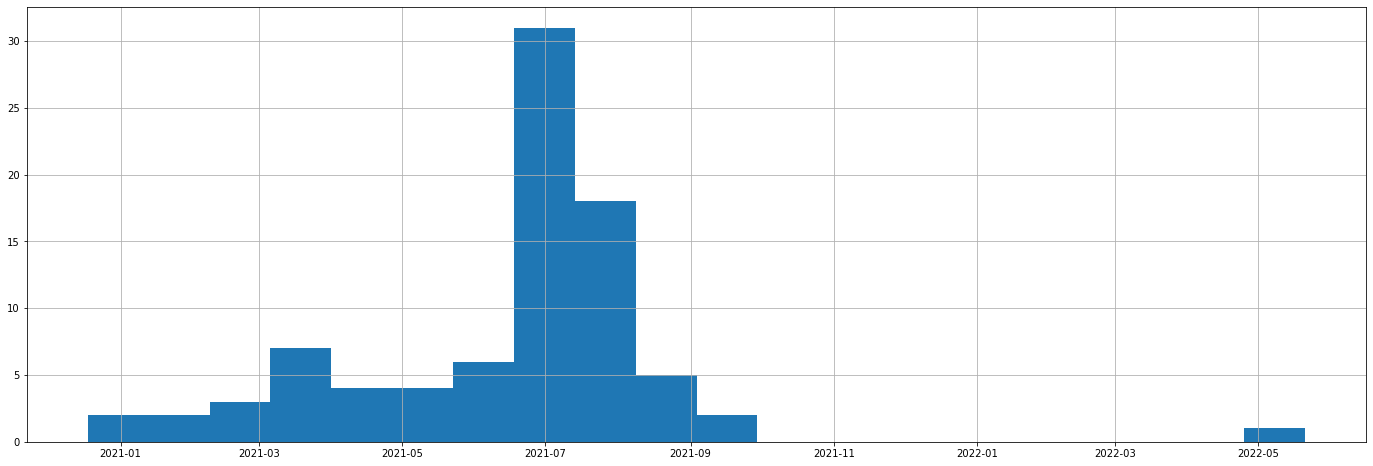

In [25]:
# Look at distribution of commit dates
recruits22['commit_date'].hist(figsize=(24,8), bins = 20)

<AxesSubplot:>

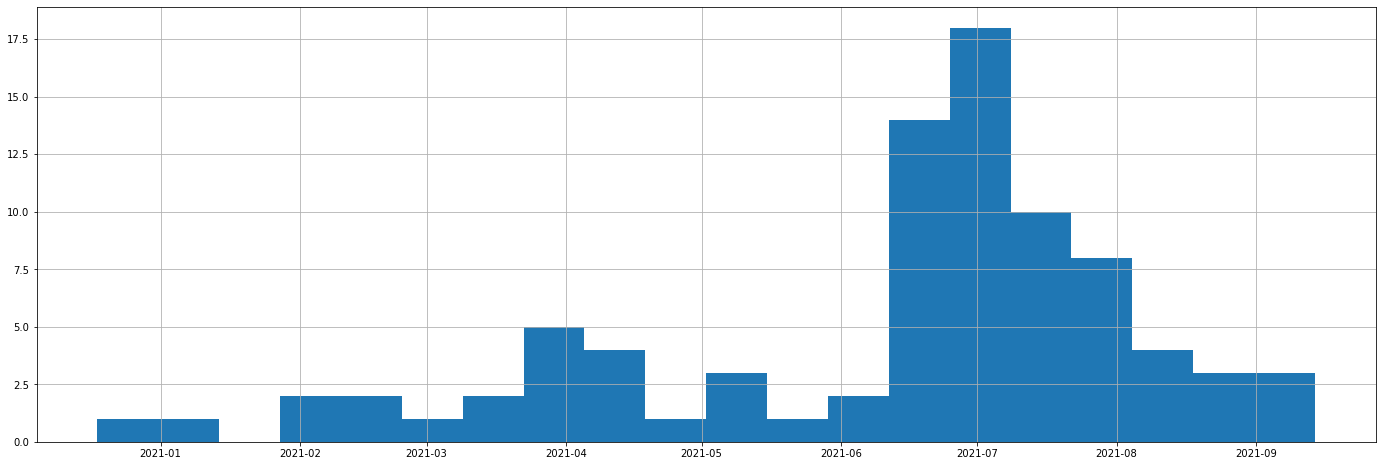

In [26]:
# There is a commit date in 2022, which can't be true
# Moving the commit date back a year
recruits22.loc[recruits22['commit_date'] > '2022-01-01', 'commit_date'] = recruits22.loc[recruits22['commit_date'] > '2022-01-01', 'commit_date'] - pd.DateOffset(years=1)

# Redisplay distribution of commit dates
recruits22['commit_date'].hist(figsize=(24,8), bins = 20)

In [27]:
# Look at months that recruits committed
print(f"Number of players not committed: {len(recruits22.loc[recruits22['commit_month'].isna()])}\n")
print("Players commitment date by month:")
recruits22['commit_month'].value_counts().sort_index()

Number of players not committed: 15

Players commitment date by month:


1      2
2      4
3      7
4      5
5      4
6     27
7     23
8      9
9      3
12     1
Name: commit_month, dtype: int64

In [39]:
# Function looks up the data for recuits committed to an entered school
# Takes user input and looks for a school, allowing for the user to misspell and/or exit
# Returns DataFrame with recuits for the school (None if exitted early)
def GetRecruitsForCollege(df):
    
    unique_colleges = [x.lower() for x in list(df.loc[~df['college'].isna(), 'college'].unique())]

    while 1==1:
        school = input('What college do you want to look at? Enter exit to stop: ').strip().lower()
        print(f'You entered: {school}')
        
        if school == 'exit':
            return None
        elif school in unique_colleges:
            school_df = df.loc[df['college'].str.lower() == school]
            return school_df
        else:
            print('You did not enter a valid school. Please try again.')


In [40]:
# Test - Look for Kentucky
GetRecruitsForCollege(recruits22)

You entered: kentucky


,rank,name,hometown,height,weight,star_ranking,grade,college,commited,commit_date,height_inches,star_rank_int,home_state,commit_month
16,17,Destin Wade,"Spring Hill, TN",6'4'',195,four-star,81,Kentucky,True,2021-04-17,76,4,Tennessee,4
19,20,Jordan Anthony,"Tylertown, MS",5'11'',165,four-star,80,Kentucky,True,2021-07-27,71,4,Mississippi,7
27,28,Treyveon Longmire,"Corbin, KY",6'2'',170,four-star,80,Kentucky,True,2021-03-26,74,4,Kentucky,3
59,60,Alex Afari,"West Chester, OH",6'2'',195,three-star,78,Kentucky,True,2021-05-07,74,3,Ohio,5


In [41]:
# Test - Look for Florida St, misspelling first attempt
GetRecruitsForCollege(recruits22)

You entered: florida state
You did not enter a valid school. Please try again.
You entered: florida st


,rank,name,hometown,height,weight,star_ranking,grade,college,commited,commit_date,height_inches,star_rank_int,home_state,commit_month
0,1,Sam McCall,"Lakeland, FL",6'0'',180,four-star,87,Florida St,True,2021-02-28,72,4,Florida,2
14,15,Rodney Hill,"Statesboro, GA",6'0'',180,four-star,81,Florida St,True,2021-04-10,72,4,Georgia,4
72,73,Brian Courtney,"Ashburn, VA",6'3'',220,three-star,76,Florida St,True,2021-04-15,75,3,Virginia,4


In [42]:
# Test - Exiting loop
GetRecruitsForCollege(recruits22)

You entered: v
You did not enter a valid school. Please try again.
You entered: whoops
You did not enter a valid school. Please try again.
You entered: exit


## Final Write of Football Recruits DataFrame

In [43]:
# Write manipulated dataframe to csv
recruits22.to_csv("2022_recruiting_final.csv", index=False)